# Logistic Regression

### **Demonstrate the concept of Logistic Regression for classification on a suitable dataset.**

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.simplefilter('ignore')

## Import Dataset

In [2]:
# Load the iris dataset

iris = load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(data = np.c_[X,y], columns = iris.feature_names + ['species'])
iris_df['species'] = iris_df['species'].map({0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'})

# Visualize the dataset

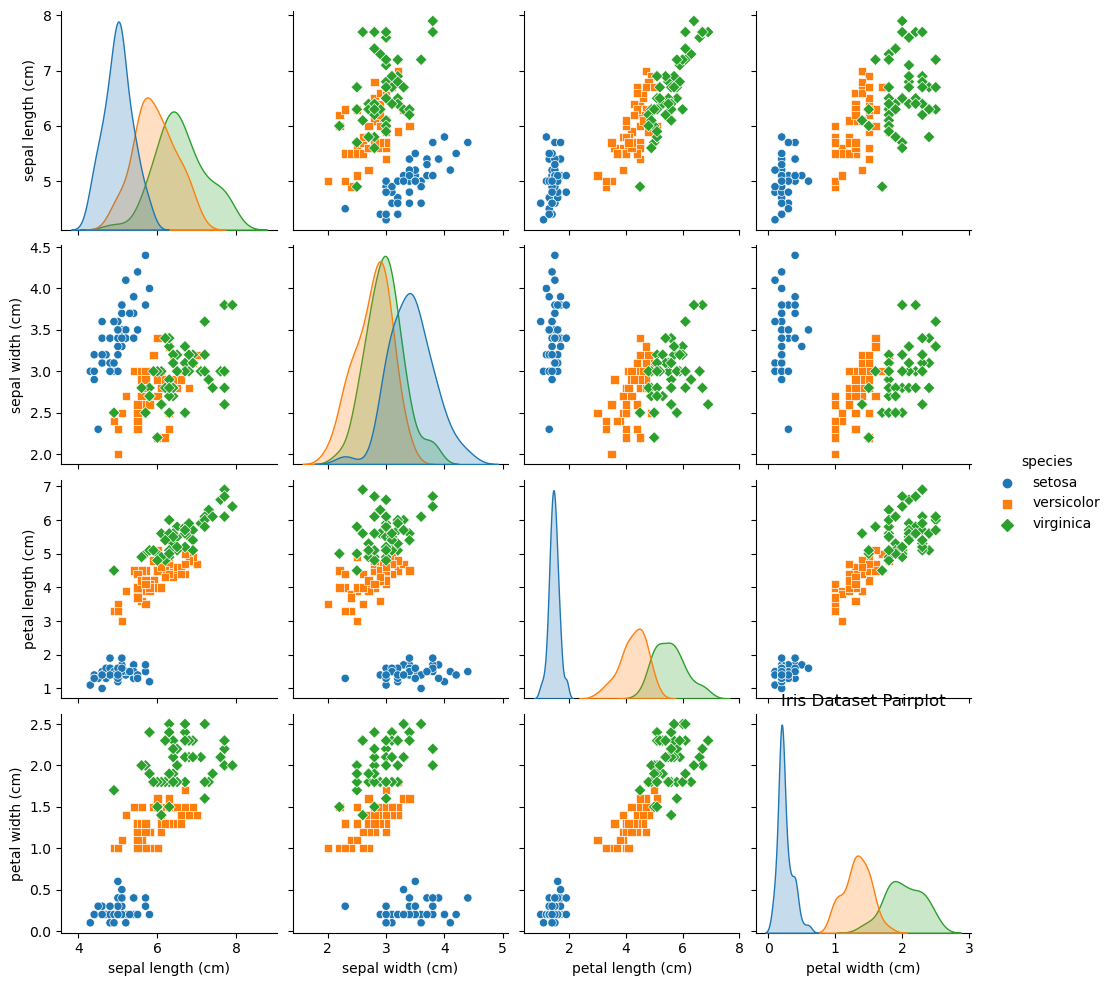

In [3]:
# Pairplot visualization

sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.title('Iris Dataset Pairplot')
plt.show()

## Modelling Process

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluate the model

In [6]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}") 

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


## Plot the Confusion Matrix

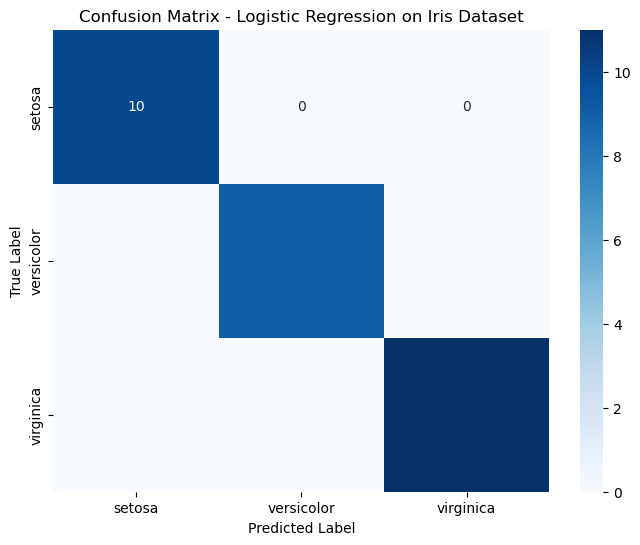

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

# Adding labels and titles
plt.title('Confusion Matrix - Logistic Regression on Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()